In [1]:
what_were_covering = {1: "data (prepare and load)", 
                      2: "build model", 
                      3: "fitting the model to data (training)", 
                      4: "making predictions and evaluting a model (invefence)", 
                      5: "saveing and loading a model", 
                      6: "putting it all together"}

In [2]:
import torch 
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt 


In [3]:
weight = 0.7 
bias = 0.3 

In [4]:
start = 0 
end = 1 
step = 0.02 

X = torch.arange(start, end, step).unsqueeze(dim=1) 
y = weight * X + bias 

# plt.plot(X, y, 'r.')
print(X[:10])
print(y[:10]) 
print(len(X), len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


In [5]:
train_split = int(0.8 * len(X)) 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

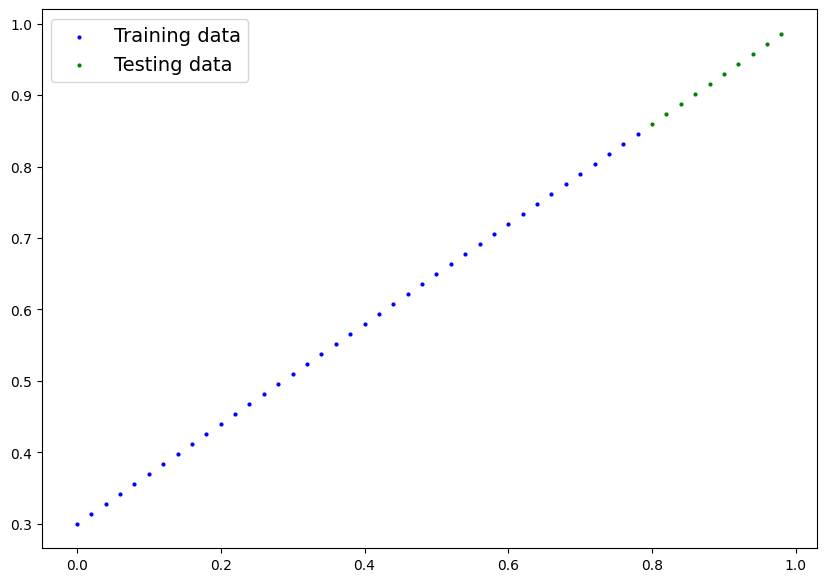

In [6]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None): 
    plt.figure(figsize=(10, 7)) 
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") 
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") 
    
    if predictions is not None: 
        plt.scatter(test_data, predictions)
        
    plt.legend(prop={"size": 14}) 
    
plot_predictions(X_train, y_train, X_test, y_test)

In [7]:
class LinearRegressionModel(nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True) 
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True) 
        
    def forward(self, x): 
        return self.weights * x + self.bias 

In [8]:
torch.manual_seed(42) 

model = LinearRegressionModel() 
list(model.parameters()) 

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
dict(model.named_parameters()) 

{'weights': Parameter containing:
 tensor([0.3367], requires_grad=True),
 'bias': Parameter containing:
 tensor([0.1288], requires_grad=True)}

In [10]:
with torch.inference_mode(): 
    y_preds = model(X_test) 

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
model.state_dict() 

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

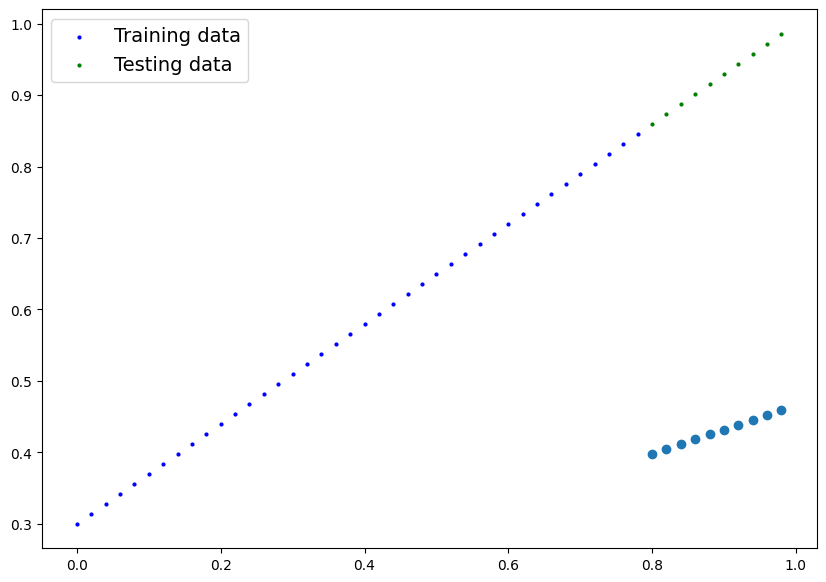

In [12]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [13]:
loss_fn = nn.L1Loss() 

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01) 

In [14]:
epochs = 100 

train_loss_values = [] 
test_loss_values = [] 
epoch_count = [] 

for epoch in range(epochs): 
    model.train() 
    
    y_pred = model(X_train) 
    
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    
    model.eval() 
    with torch.inference_mode(): 
        test_pred = model(X_test) 
        test_loss = loss_fn(test_pred, y_test) 
        
    if epoch % 10 == 0: 
        epoch_count.append(epoch) 
        train_loss_values.append(loss.item()) 
        test_loss_values.append(test_loss.item()) 
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}") 

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.47563618421554565
Epoch: 10 | MAE Train Loss: 0.17388132214546204 | MAE Test Loss: 0.2866361737251282
Epoch: 20 | MAE Train Loss: 0.042198795825242996 | MAE Test Loss: 0.0987466350197792
Epoch: 30 | MAE Train Loss: 0.044207725673913956 | MAE Test Loss: 0.005456471350044012
Epoch: 40 | MAE Train Loss: 0.022640453651547432 | MAE Test Loss: 0.06350341439247131
Epoch: 50 | MAE Train Loss: 0.01708555594086647 | MAE Test Loss: 0.04095938056707382
Epoch: 60 | MAE Train Loss: 0.008707202039659023 | MAE Test Loss: 0.013333231210708618
Epoch: 70 | MAE Train Loss: 0.002307144459336996 | MAE Test Loss: 0.00234525790438056
Epoch: 80 | MAE Train Loss: 0.0022460990585386753 | MAE Test Loss: 0.0020260154269635677
Epoch: 90 | MAE Train Loss: 0.0018263027304783463 | MAE Test Loss: 0.0037561357021331787


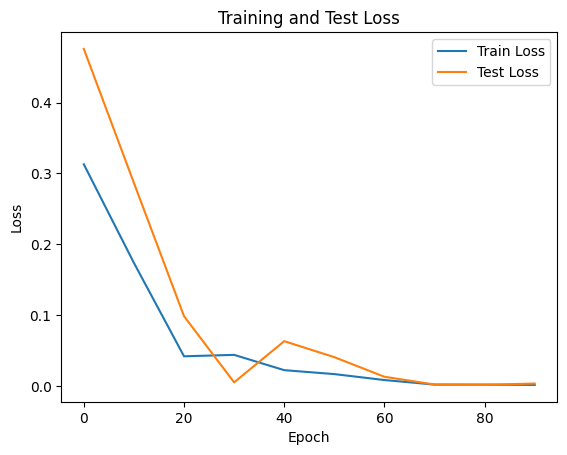

In [15]:
plt.plot(epoch_count, train_loss_values, label="Train Loss") 
plt.plot(epoch_count, test_loss_values, label="Test Loss") 
plt.title("Training and Test Loss") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.legend() 

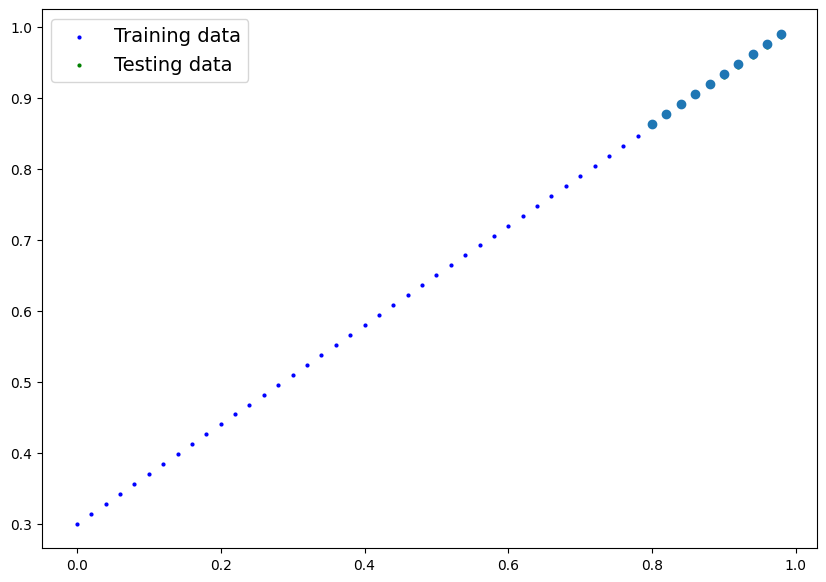

In [16]:
with torch.inference_mode(): 
    y_preds = model(X_test) 
    
plot_predictions(X_train, y_train, X_test, y_test, y_preds) 

In [17]:
dict(model.named_parameters()) 

{'weights': Parameter containing:
 tensor([0.7037], requires_grad=True),
 'bias': Parameter containing:
 tensor([0.3006], requires_grad=True)}

## Putting it all together

In [38]:
# create data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 


# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


* nn.linear(in_features, out_features)  
Applies a linear transformation to the incoming data: `y=xAT+b`.

In [64]:
# torch.nn.Linear() 
class MyLinearLayer(nn.Module): 
    def __init__(self, in_features, out_features, bias=True): 
        super().__init__() 
        self.weight = nn.Parameter(torch.randn(out_features, in_features, dtype=torch.float32), requires_grad=True) 
        if bias:
            self.bias = nn.Parameter(torch.randn(out_features, dtype=torch.float32), requires_grad=True) 
        else: 
            self.bias = None 
        
    def forward(self, x): 
        if self.bias is None: 
            x = x @ self.weight.t()
        else: 
            x = x @ self.weight.t() + self.bias
        
        return x 


In [78]:
# build model 

class Model(nn.Module): 
    def __init__(self): 
        super().__init__() 
        # self.linear_layer = nn.Linear(in_features=1, out_features=1, bias=True)
        self.inputs = MyLinearLayer(1, 3, bias=True) 
        self.relu = nn.ReLU(inplace=True) 
        self.outputs = MyLinearLayer(3, 1, bias=True) 
        
    def forward(self, x): 
        x = self.inputs(x)
        x = self.relu(x) 
        x = self.outputs(x) 
        
        return x 

In [79]:
torch.manual_seed(42) 

model0 = Model() 
model0 

Model(
  (inputs): MyLinearLayer()
  (relu): ReLU(inplace=True)
  (outputs): MyLinearLayer()
)

In [80]:
param_dict = dict(model0.named_parameters())
param_dict

{'inputs.weight': Parameter containing:
 tensor([[0.3367],
         [0.1288],
         [0.2345]], requires_grad=True),
 'inputs.bias': Parameter containing:
 tensor([ 0.2303, -1.1229, -0.1863], requires_grad=True),
 'outputs.weight': Parameter containing:
 tensor([[ 2.2082, -0.6380,  0.4617]], requires_grad=True),
 'outputs.bias': Parameter containing:
 tensor([0.2674], requires_grad=True)}

In [81]:
param_dict.keys() 

dict_keys(['inputs.weight', 'inputs.bias', 'outputs.weight', 'outputs.bias'])

In [82]:
print(type(param_dict["inputs.weight"])) 
param_dict["inputs.weight"]

<class 'torch.nn.parameter.Parameter'>


Parameter containing:
tensor([[0.3367],
        [0.1288],
        [0.2345]], requires_grad=True)

In [83]:
with torch.inference_mode():
    y_preds = model0(X_test)

y_preds

tensor([[1.3713],
        [1.3884],
        [1.4054],
        [1.4224],
        [1.4395],
        [1.4565],
        [1.4735],
        [1.4906],
        [1.5076],
        [1.5246]])

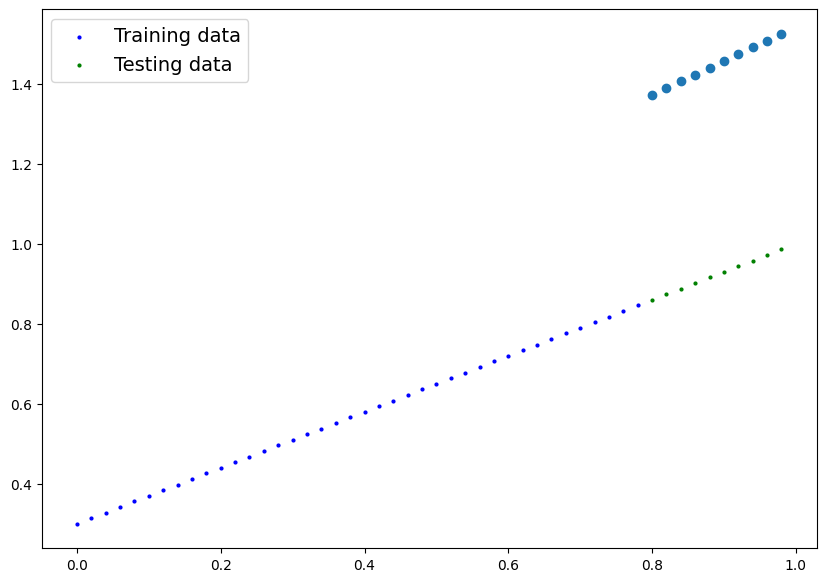

In [84]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [85]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params=model0.parameters(), lr=0.01)

In [86]:
epochs = 100 

train_loss_values = [] 
test_loss_values = [] 
epoch_count = [] 

for epoch in range(epochs): 
    model0.train() 
    
    y_pred = model0(X_train) 
    
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    
    model0.eval() 
    with torch.inference_mode(): 
        test_pred = model0(X_test) 
        test_loss = loss_fn(test_pred, y_test) 
        
    if epoch % 10 == 0: 
        epoch_count.append(epoch) 
        train_loss_values.append(loss.item()) 
        test_loss_values.append(test_loss.item()) 
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}") 

Epoch: 0 | MAE Train Loss: 0.4929298758506775 | MAE Test Loss: 0.46813899278640747
Epoch: 10 | MAE Train Loss: 0.06606079638004303 | MAE Test Loss: 0.07701107859611511
Epoch: 20 | MAE Train Loss: 0.08979469537734985 | MAE Test Loss: 0.1917085349559784
Epoch: 30 | MAE Train Loss: 0.053102314472198486 | MAE Test Loss: 0.008923059329390526
Epoch: 40 | MAE Train Loss: 0.031680915504693985 | MAE Test Loss: 0.07424303889274597
Epoch: 50 | MAE Train Loss: 0.007835237309336662 | MAE Test Loss: 0.010572302155196667
Epoch: 60 | MAE Train Loss: 0.008689510636031628 | MAE Test Loss: 0.017946559935808182
Epoch: 70 | MAE Train Loss: 0.005140946712344885 | MAE Test Loss: 0.016383344307541847
Epoch: 80 | MAE Train Loss: 0.007908390834927559 | MAE Test Loss: 0.006095522549003363
Epoch: 90 | MAE Train Loss: 0.0012865863973274827 | MAE Test Loss: 0.006183368153870106


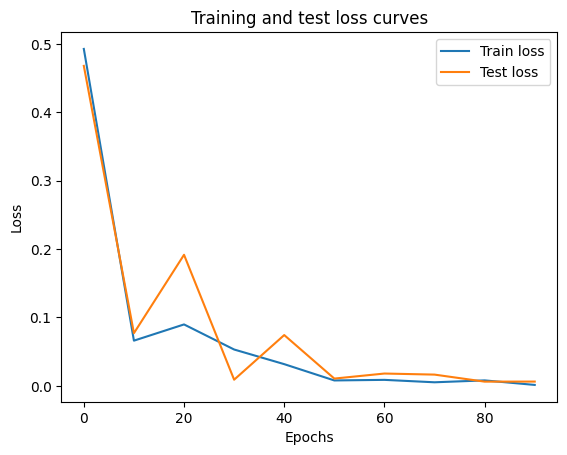

In [87]:
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend()

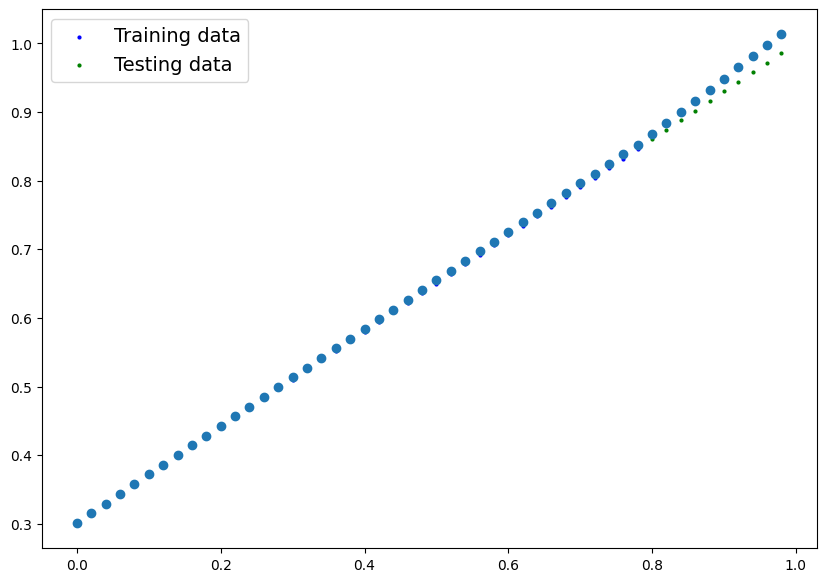

In [88]:
with torch.inference_mode():
    y_preds_train = model0(X_train)
    y_preds_test = model0(X_test)

y_preds_total = torch.cat([y_preds_train, y_preds_test], dim=0)


plt.figure(figsize=(10, 7)) 

plt.scatter(X_train, y_train, c="b", s=4, label="Training data") 
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data") 

plt.scatter(X, y_preds_total)
    
plt.legend(prop={"size": 14}) 

In [89]:
model0.state_dict()["inputs.weight"] 

tensor([[0.3378],
        [0.1288],
        [0.2345]])

In [92]:
model0.state_dict()["inputs.bias"]

tensor([ 0.0846, -1.1229, -0.1863])

In [90]:
model0.state_dict()["outputs.weight"]

tensor([[ 2.0926, -0.6380,  0.4617]])

In [96]:
model0.state_dict()["outputs.bias"]

tensor([0.1242])

In [98]:
# if input == 1.0 일때 
torch.tensor([0.3378+0.0846, 0, 0.2345-0.1863]) @ torch.tensor([2.0926, -0.6380, 0.4617]) + torch.tensor([0.1242])

tensor([1.0304])

In [95]:
with torch.inference_mode():
    output = model0(torch.tensor([1.0])) 
    
output

tensor([1.0302])